In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

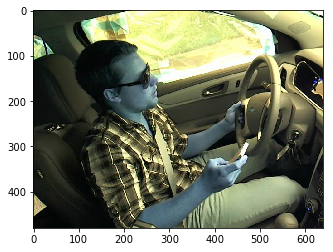

In [2]:
img=cv2.imread("C:/Users/saika/Desktop/images/img_6.jpg")
plt.imshow(img)

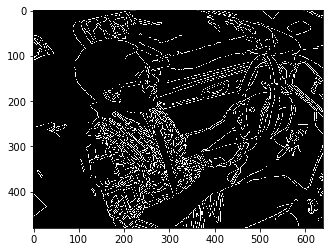

In [3]:
#img = cv2.equalizeHist(img)
img = cv2.GaussianBlur(img,(5,5),0)
#img = cv2.Laplacian(img,cv2.CV_8UC1)
img1= cv2.Canny(img,150,50)
plt.imshow(img1,cmap='gray')

In [4]:
img2=cv2.bitwise_and(img1,img)
plt.imshow(img2,cmap="gray")

error: C:\bld\opencv_1510580008682\work\opencv-3.3.0\modules\core\src\arithm.cpp:225: error: (-209) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function cv::binary_op


In [5]:
# Initiate STAR detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img2,None)
kp = orb.detect(img1,None)

# compute the descriptors with ORB
kp, des = orb.compute(img2, kp)
kp, des = orb.compute(img1, kp)


# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img2,kp,color=(0,255,0),flags=0,outImage=None)
img3 = cv2.drawKeypoints(img1,kp,color=(0,255,0),flags=0,outImage=None)
plt.imshow(img2),plt.show()

NameError: name 'img2' is not defined

In [6]:
img3 = cv2.cvtColor(img3,cv2.COLOR_GRAY2RGB)

plt.imshow(img3)

NameError: name 'img3' is not defined

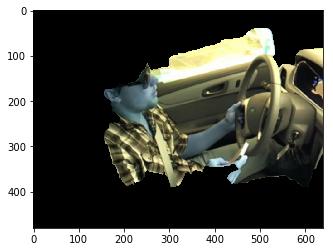

(<matplotlib.image.AxesImage at 0x1f9386e6400>, None)

In [7]:
# img=cv2.imread("C:/Users/saika/Desktop/images/img_6.jpg")
k=img
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (100,40,550,350)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.show()

True

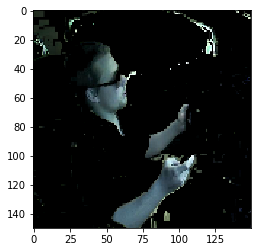

In [8]:
img=cv2.imread("C:/Users/saika/Desktop/images/img_6.jpg")
k=img
# Constants for finding range of skin color in YCrCb
min_YCrCb = np.array([0,113,80],np.uint8)
max_YCrCb = np.array([255,153,125],np.uint8)
imageYCrCb = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)

# Find region with skin tone in YCrCb image

skinRegion = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)
img = cv2.bitwise_and(img,img,mask=skinRegion)
img = cv2.resize(img,(150,150))
plt.imshow(img)
cv2.imwrite("C:/Users/saika/Desktop/img_6.jpg",img)



In [ ]:
import os
import time
start_time = time.time()
print(start_time)
data_dir='C:/Users/saika/Desktop/classes'
target_dir="C:/Users/saika/Desktop/target"
i=0
for categ in os.listdir(data_dir):
    path = os.path.join(data_dir,categ)
    i=i+1
    for image in (os.listdir(path)):
        path2 = os.path.join(path,image)
        if (os.path.exists(path2)):
            img=cv2.imread(path2)
            gray = cv2.imread(path2,cv2.IMREAD_GRAYSCALE)
            k=img
            # Constants for finding range of skin color in YCrCb
            min_YCrCb = np.array([0,113,80],np.uint8)
            max_YCrCb = np.array([255,153,125],np.uint8)
            imageYCrCb = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)

            # Find region with skin tone in YCrCb image

            skinRegion = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)
            img = cv2.bitwise_and(img,img,mask=skinRegion)
            img = cv2.resize(img,(150,150))
            img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
            target_path = os.path.join(target_dir,categ)
            if not os.path.exists(target_path):
                os.makedirs(target_path)
            target_image_path = os.path.join(target_path,image)
            cv2.imwrite(target_image_path,img) 
    print(categ+":"+str(time.time()-start_time))
print(time.time()-start_time)

1512016979.186994


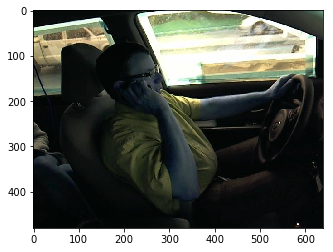

In [4]:
plt.imshow(k)